# **INSTALL LIBRARIES**

In [14]:
!pip install shap lime
import shap
from lime.lime_tabular import LimeTabularExplainer
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import shap
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
df = pd.read_csv("social_media_cleaned_scaled.csv")

X = df.drop(columns=["Target"])
y = df["Target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42, stratify=y)

In [20]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n Evaluation Metrics for {model_name}")
    print(f"Accuracy  : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision : {precision_score(y_true, y_pred):.4f}")
    print(f"Recall    : {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score  : {f1_score(y_true, y_pred):.4f}")
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:02:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 Evaluation Metrics for XGBoost
Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1 Score  : 1.0000

Confusion Matrix:


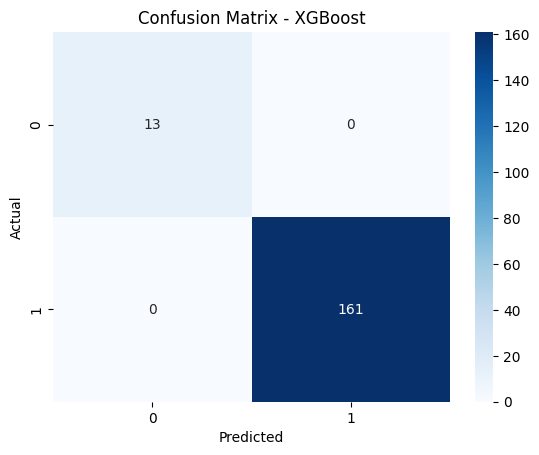

In [21]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

evaluate_model(y_test, xgb_preds, "XGBoost")

# **SHAP**

In [22]:
explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Not Addicted', 'Addicted'],
    mode='classification'
)

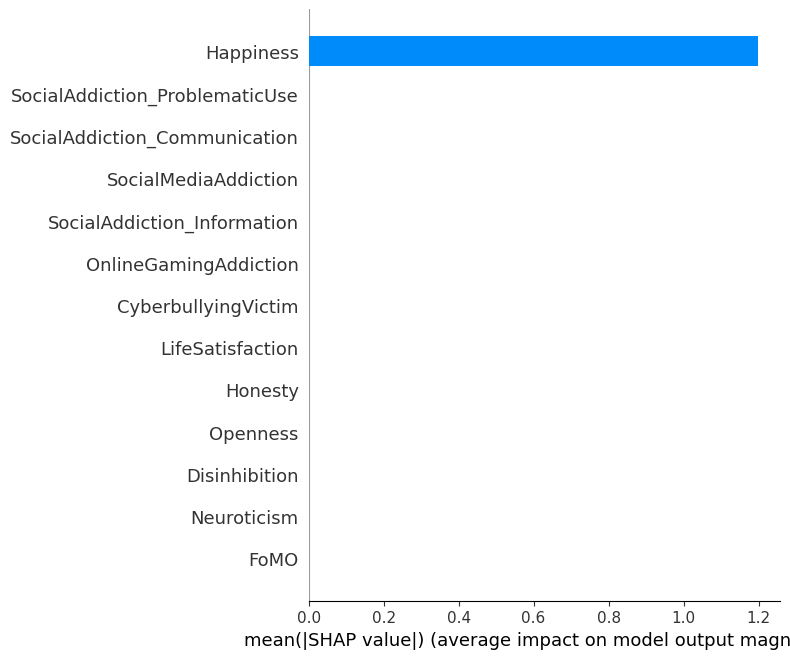

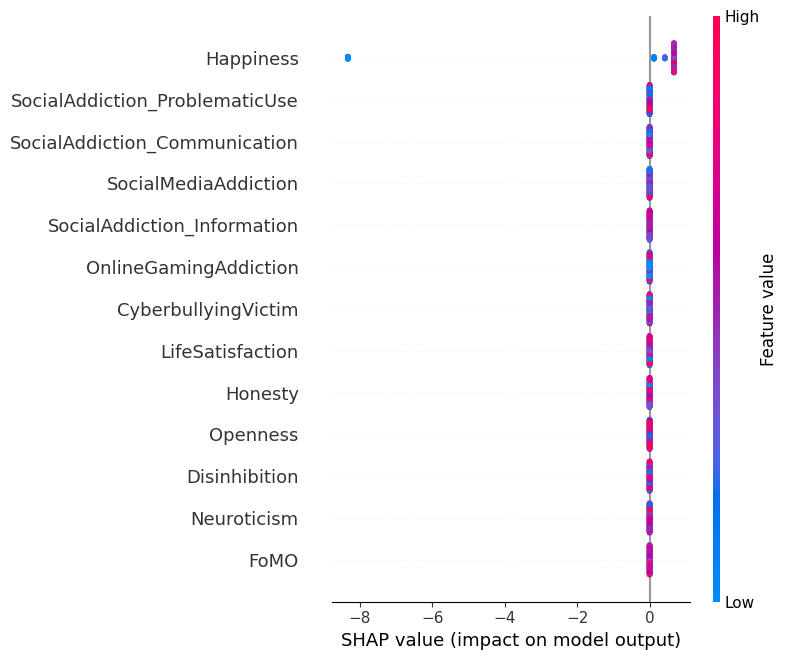

In [23]:
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

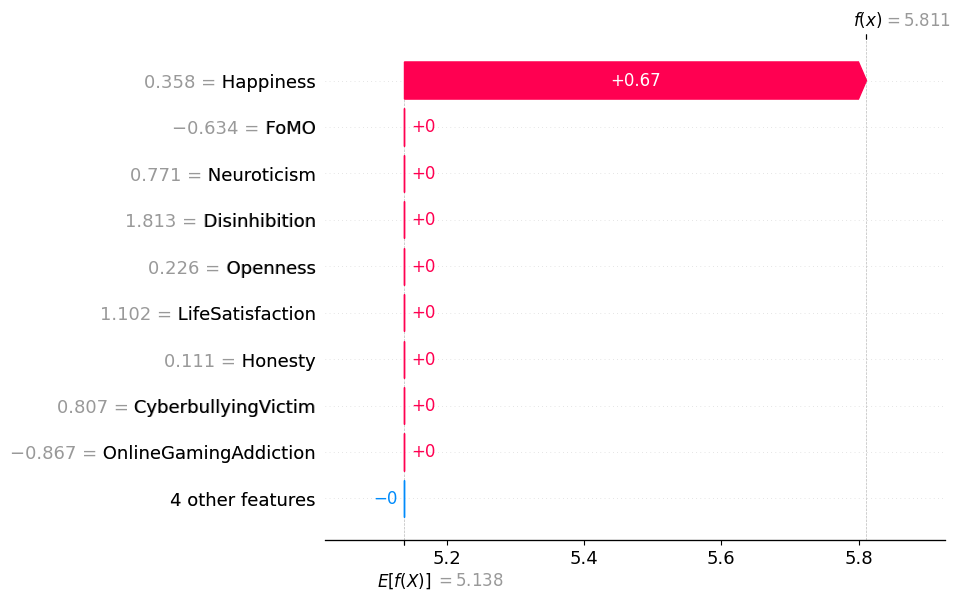

In [24]:
shap.plots.waterfall(shap_values[0])

# **LIME**

In [25]:
explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Not Addicted', 'Addicted'],
    mode='classification'
)

In [26]:
# Explain the first test sample
exp = explainer.explain_instance(
    data_row=X_test.iloc[0],
    predict_fn=xgb_model.predict_proba
)

# Visualize explanation
exp.show_in_notebook(show_table=True)


/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.